In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
data_df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
data_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
# Summary statistics for numerical columns
numerical_summary = data_df.describe()

# Summary statistics for categorical columns
categorical_summary = data_df.describe(include=['object'])

# Display the summaries
print("Numerical Summary Statistics:")
print(numerical_summary)
print("\nCategorical Summary Statistics:")
print(categorical_summary)

Numerical Summary Statistics:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%

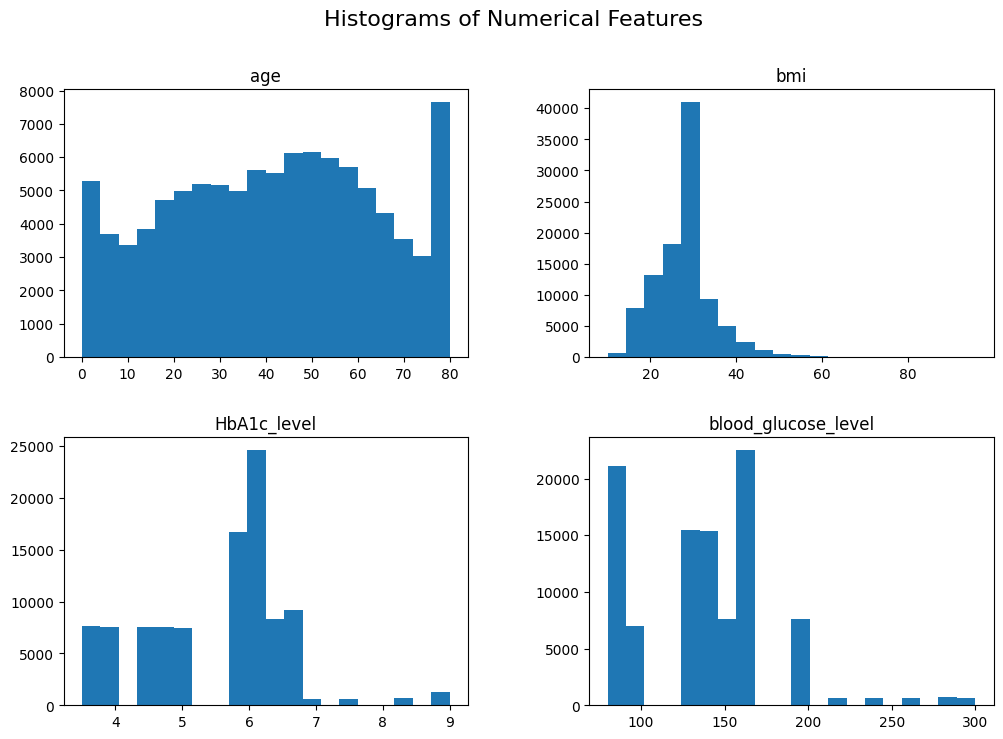

In [9]:
# Histogram for numerical columns
data_df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].hist(bins=20, figsize=(12, 8), grid=False)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

<ipython-input-13-a78322bf0559>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df, x='diabetes', y='bmi', palette='Set2')


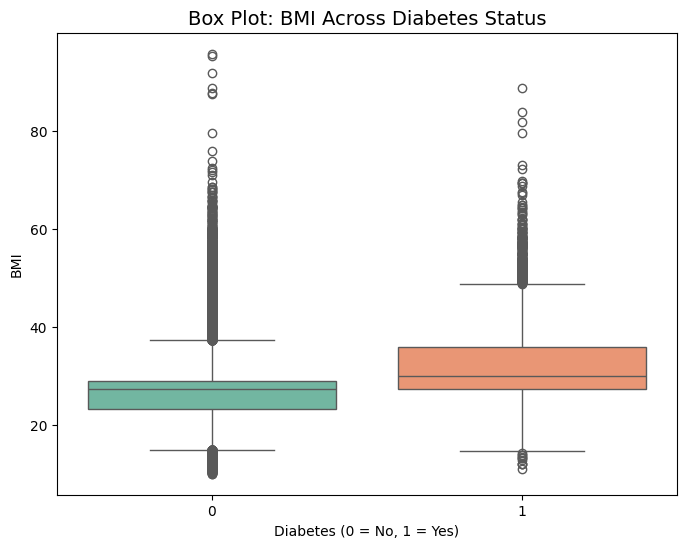

In [13]:
#scatter plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_df, x='diabetes', y='bmi', palette='Set2')
plt.title("Box Plot: BMI Across Diabetes Status", fontsize=14)
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

<ipython-input-14-5bc558a55ff5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_df, x='diabetes', y='bmi', palette='Set2')


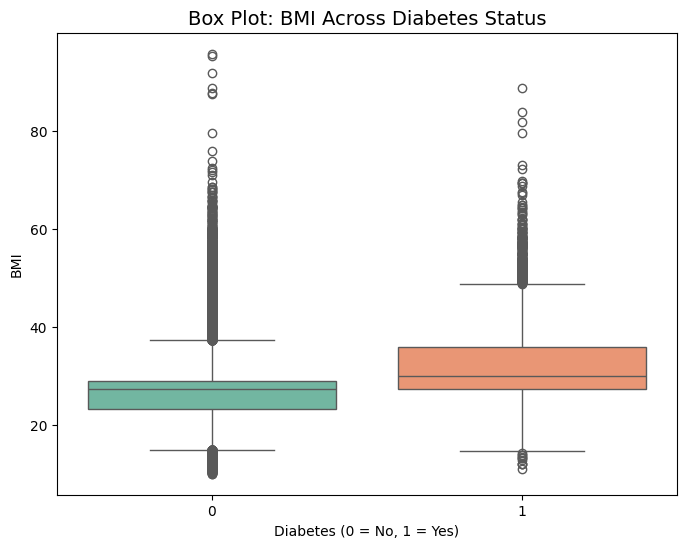

In [14]:
#Box plot:BMI across diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_df, x='diabetes', y='bmi', palette='Set2')
plt.title("Box Plot: BMI Across Diabetes Status", fontsize=14)
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
# Step 1: Handle Missing Values
# Numerical columns: Fill missing values with mean
numerical_columns = data_df.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
data_df[numerical_columns] = numerical_imputer.fit_transform(data_df[numerical_columns])


In [17]:
# Step 1: Handle Missing Values
# Numerical columns: Fill missing values with mean
numerical_columns = data_df.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
data_df[numerical_columns] = numerical_imputer.fit_transform(data_df[numerical_columns])

# Categorical columns: Fill missing values with mode
categorical_columns = data_df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_df[categorical_columns] = categorical_imputer.fit_transform(data_df[categorical_columns])

# Step 2: Encode Categorical Variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_df[column] = label_encoder.fit_transform(data_df[column])

# Step 3: Normalize/Standardize Features
# Select numerical columns for scaling
scaler = StandardScaler()
data_df[numerical_columns] = scaler.fit_transform(data_df[numerical_columns])

# Display the first few rows of the processed dataset
print("Processed Dataset Sample:")
print(data_df.head())

Processed Dataset Sample:
   gender       age  hypertension  heart_disease  smoking_history       bmi  \
0       0  1.692704     -0.284439       4.936379                4 -0.321056   
1       0  0.538006     -0.284439      -0.202578                0 -0.000116   
2       1 -0.616691     -0.284439      -0.202578                4 -0.000116   
3       0 -0.261399     -0.284439      -0.202578                1 -0.583232   
4       1  1.515058      3.515687       4.936379                1 -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704 -0.304789  
1     1.001706            -1.426210 -0.304789  
2     0.161108             0.489878 -0.304789  
3    -0.492690             0.416183 -0.304789  
4    -0.679490             0.416183 -0.304789  


In [33]:
#3:Model implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [34]:
# Assuming 'diabetes' is the target variable
X = data_df.drop('diabetes', axis=1)  # Features
y = data_df['diabetes']              # Target

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
# Assuming 'diabetes' is the target variable
X = data_df.drop('diabetes', axis=1)  # Features
y = data_df['diabetes']              # Target

# Check if 'diabetes' is continuous:
if y.dtype != 'int64' and y.dtype != 'int32':
    # If 'diabetes' has continuous values, use LinearRegression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    print("Using Linear Regression as the target variable is continuous.")
else:
    # If 'diabetes' is binary (0 or 1), use LogisticRegression
    model = LogisticRegression(max_iter=1000, random_state=42)
    print("Using Logistic Regression as the target variable is binary.")

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train)

Using Linear Regression as the target variable is continuous.


LinearRegression()

In [37]:
# ... (your previous code)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance (for regression)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Display the results
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# ... (rest of your code)

R-squared: 0.35
Mean Squared Error: 0.65
Mean Absolute Error: 0.55


In [39]:
# Assuming 'diabetes' is the target variable
X = data_df.drop('diabetes', axis=1)  # Features
y = data_df['diabetes']              # Target

# Check if 'diabetes' is continuous:
if y.dtype != 'int64' and y.dtype != 'int32':
    # If 'diabetes' has continuous values, use LinearRegression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    print("Using Linear Regression as the target variable is continuous.")
else:
    # If 'diabetes' is binary (0 or 1), use LogisticRegression
    model = LogisticRegression(max_iter=1000, random_state=42)
    print("Using Logistic Regression as the target variable is binary.")

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model.fit(X_train, y_train)

# Coefficients of the logistic regression model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]  # Changed to 'model'
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Using Linear Regression as the target variable is continuous.

Feature Importance:
               Feature  Coefficient
0               gender     0.051506
1                  age     0.051506
2         hypertension     0.051506
3        heart_disease     0.051506
4      smoking_history     0.051506
5                  bmi     0.051506
6          HbA1c_level     0.051506
7  blood_glucose_level     0.051506


In [40]:
# ... (your previous code)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation Metrics (for regression)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Display the results
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")



R-squared: 0.35
Mean Squared Error: 0.65
Mean Absolute Error: 0.55
